In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import streamlit as st

In [321]:
df = pd.read_csv('Family_guy_dialog.csv')

df.head()

,character,dialog,seasons
0,Stewie,"Damn you, vile woman! Youve impeded my work s...",season 1
1,Stewie,"Hello, Mother.",season 1
2,Lois,"Well, hi, there, sweetie!",season 1
3,Stewie,"You know, Mother, life is like a box of choco...",season 1
4,Stewie,"Now, I offer you one last chance for deliverance",season 1


In [322]:
df.character.unique()

array(['Stewie', 'Lois', 'Peter', 'Brian', 'Meg', 'Chris',
       'Maids and Butlers M&B', 'Quagmire', 'Cleveland'], dtype=object)

In [323]:
words = {}
garbage = ['!', ',', '.', '"', "'"]

def count_words(sentance):
    sentance = sentance.replace(u'\xa0', u' ')
    lst = sentance.strip().lower().split(' ')

    for i in range(len(lst)):
        for x in lst[i]:
            if len(lst[i]) > 3:
                if x in garbage:
                    for y in garbage:
                        lst[i] = lst[i].replace(y, "")
        if len(lst[i]) > 3:
            words.setdefault(lst[i], 0)
            words[lst[i]] += 1
    
    return lst


In [324]:
for i in df.dialog: count_words(i)

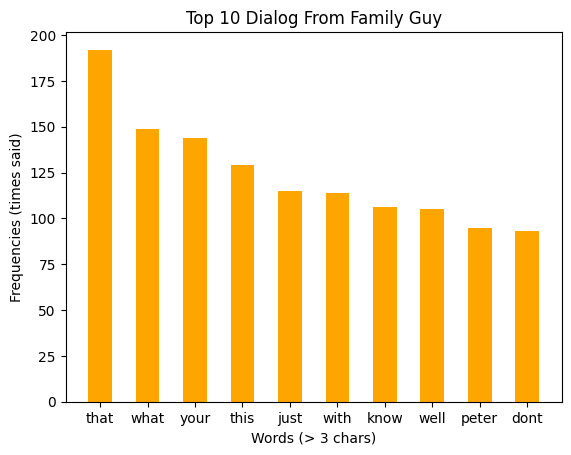

In [325]:
sort = dict(sorted(words.items(), key=lambda x: x[1], reverse=True)[:10])

top5words = list(sort.keys())
top5count = list(sort.values())

df2 = pd.DataFrame(
    {'word': top5words,
    'count': top5count}
)

plt.bar(top5words, top5count, color="orange", width = .5)
plt.xlabel("Words (> 3 chars)")
plt.ylabel("Frequencies (times said)")
plt.title("Top 10 Dialog From Family Guy")
plt.show()

In [326]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import PIL.Image
import random

def create_cloud(mask, text, color_set, stopwords = []):
    sw = set(STOPWORDS)
    for word in stopwords: sw.add(word)

    return WordCloud(
        stopwords=sw,
        # max_words=1000,
        mask=mask,
        background_color="black",
        color_func=lambda *args, **kwargs: random.choice(color_set), # list of tuples (3)
        min_font_size=8
    ).generate(text)

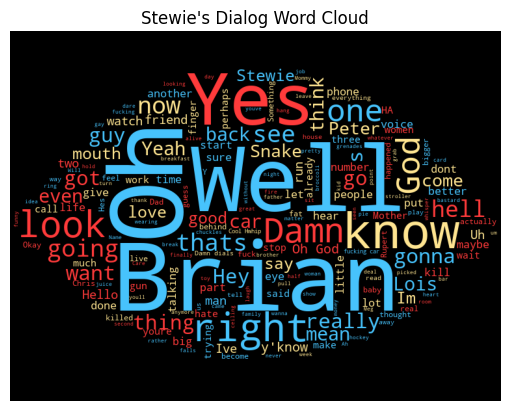

In [327]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import PIL.Image
import random

# Texts
def dialog(person):
    cdf = df.loc[df.character == person]
    return ''.join(cdf.dialog)

# Colors
colors = {
    'stewie': [(255, 59, 59), (71, 195, 252), (255, 229, 145)],
    'peter': [(39, 64, 37), (255, 255, 255), (92, 70, 60)],
    'quagmire': [(249, 255, 82), (255, 36, 36), (41, 41, 94)],
    'brian': [(255, 255, 255), (237, 178, 0), (255, 37, 8)],
}

# Creation
def draw_cloud(character):
    eval(f'''plt.imshow(
                create_cloud(
                    np.array(PIL.Image.open(\'./assets/{character.lower()}head.png\')), 
                    dialog("{character.title()}"), 
                    colors["{character.lower()}"], []
                    )
                )''')
    plt.axis('off')
    plt.title(f"{character.title()}'s Dialog Word Cloud")
    plt.show()
    
draw_cloud("stewie")
draw_cloud("brian")
draw_cloud("peter")
draw_cloud("quagmire")